# ETH price prediction with LSTM neural network


In [56]:
### Keras and Tensorflow >2.0

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv('ETH-USD.csv')

In [59]:
df.drop(columns=['Adj Close','Volume'])

,Date,Open,High,Low,Close
0,2015-08-07,2.831620,3.536610,2.521120,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325
2,2015-08-09,0.706136,0.879810,0.629191,0.701897
3,2015-08-10,0.713989,0.729854,0.636546,0.708448
4,2015-08-11,0.708087,1.131410,0.663235,1.067860
...,...,...,...,...,...
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779


In [60]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10
2180,2021-07-26,2177.329590,2384.400635,2177.329590,2340.090820,2340.090820,2.389353e+10


In [61]:
df1=df.reset_index()['Close']

In [62]:
df1

0          2.772120
1          0.753325
2          0.701897
3          0.708448
4          1.067860
           ...     
2176    2025.202759
2177    2124.776611
2178    2189.218750
2179    2191.373779
2180    2340.090820
Name: Close, Length: 2181, dtype: float64

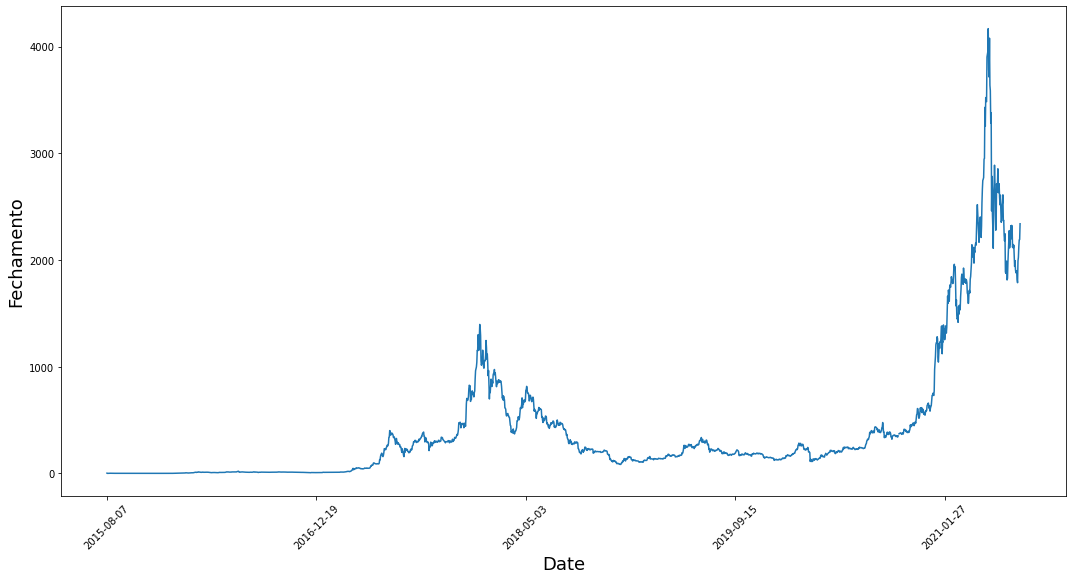

In [63]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),df['Close'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Fechamento',fontsize=18)
plt.show()

In [64]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [65]:
import numpy as np

In [66]:
df1   # ETH/USD close price

0          2.772120
1          0.753325
2          0.701897
3          0.708448
4          1.067860
           ...     
2176    2025.202759
2177    2124.776611
2178    2189.218750
2179    2191.373779
2180    2340.090820
Name: Close, Length: 2181, dtype: float64

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
print(df1)  # ETH/USD close price normalized

[[5.60734561e-04]
 [7.64097046e-05]
 [6.40717214e-05]
 ...
 [5.25106541e-01]
 [5.25623549e-01]
 [5.61301941e-01]]


In [69]:
# splitting dataset into train and test data
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [70]:
training_size,test_size   # shows the size of each group of data

(1308, 873)

In [71]:
train_data

array([[5.60734561e-04],
       [7.64097046e-05],
       [6.40717214e-05],
       ...,
       [3.05497021e-02],
       [3.29603599e-02],
       [3.31923422e-02]])

In [72]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [73]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [74]:
print(X_train.shape), print(y_train.shape)

(1207, 100)
(1207,)


(None, None)

In [75]:
print(X_test.shape), print(ytest.shape)

(772, 100)
(772,)


(None, None)

In [76]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [77]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [78]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [79]:
model.summary() # show the LSTM network structure

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
metadata = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 11s 287ms/step - loss: 0.0014 - val_loss: nan
Epoch 2/100
19/19 [==============================] - 4s 216ms/step - loss: 3.3614e-04 - val_loss: nan
Epoch 3/100
19/19 [==============================] - 4s 216ms/step - loss: 2.5602e-04 - val_loss: nan
Epoch 4/100
19/19 [==============================] - 4s 214ms/step - loss: 2.2212e-04 - val_loss: nan
Epoch 5/100
19/19 [==============================] - 4s 215ms/step - loss: 2.2421e-04 - val_loss: nan
Epoch 6/100
19/19 [==============================] - 4s 217ms/step - loss: 2.1056e-04 - val_loss: nan
Epoch 7/100
19/19 [==============================] - 4s 216ms/step - loss: 2.1683e-04 - val_loss: nan
Epoch 8/100
19/19 [==============================] - 4s 213ms/step - loss: 1.7384e-04 - val_loss: nan
Epoch 9/100
19/19 [==============================] - 4s 217ms/step - loss: 1.7442e-04 - val_loss: nan
Epoch 10/100
19/19 [==============================] - 4s 217ms/step - loss: 1.7875e-0

dict_keys(['loss', 'val_loss'])


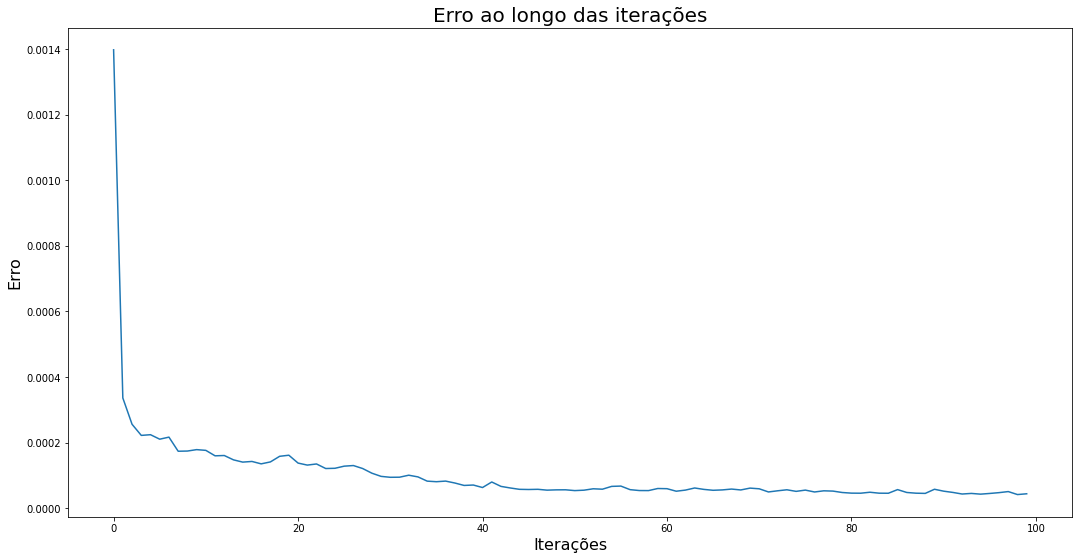

In [81]:
# list all data in history
print(metadata.history.keys())

# summarize history for loss
plt.figure(figsize=(18,9))
plt.plot(metadata.history['loss'])
plt.plot(metadata.history['val_loss'])
plt.title('Erro ao longo das iterações', fontsize=20)
plt.ylabel('Erro', fontsize=16)
plt.xlabel('Iterações', fontsize=16)
plt.show()

In [82]:
import tensorflow as tf

In [83]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [84]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [85]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

341.74621874573035

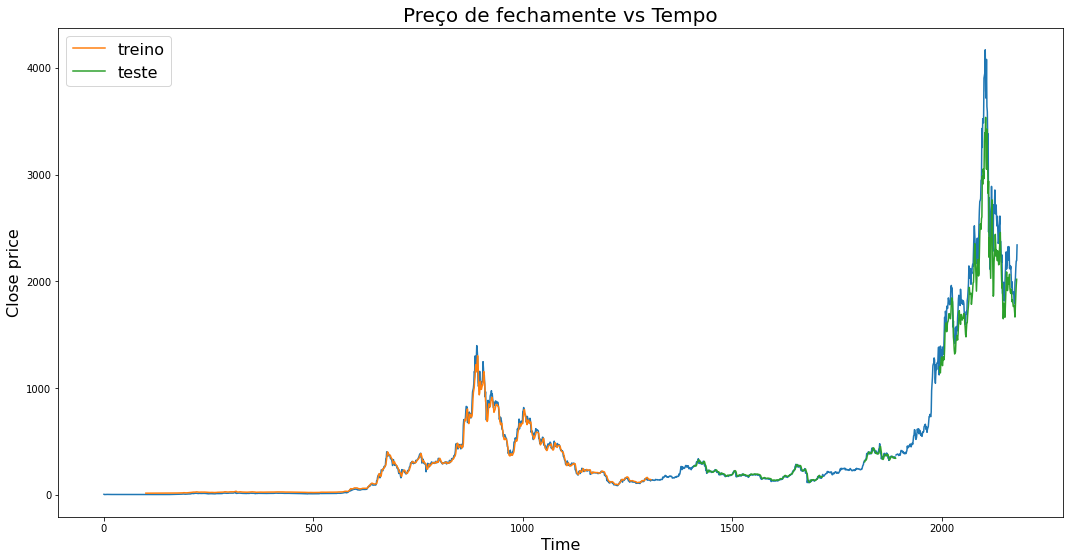

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(18,9))
plt.title('Preço de fechamente vs Tempo', fontsize=20)
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, label='treino')
plt.plot(testPredictPlot, label='teste')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Close price', fontsize=16)
plt.legend(fontsize=16)

plt.show()